In [ ]:
import pandas as pd 
import numpy as np  

In [ ]:
data=pd.read_csv('customer_booking.csv',encoding="latin1")

In [ ]:
data.head(100)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,Internet,RoundTrip,8,33,3,Tue,AKLKUL,New Zealand,0,0,0,8.83,0
96,2,Internet,RoundTrip,138,35,19,Fri,AKLKUL,Switzerland,1,0,1,8.83,0
97,1,Internet,RoundTrip,134,37,20,Wed,AKLKUL,New Zealand,0,1,0,8.83,0
98,2,Internet,RoundTrip,8,29,18,Thu,AKLKUL,New Zealand,1,0,0,8.83,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
data.shape

(50000, 14)

In [ ]:
data['booking_complete'].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [ ]:
data['booking_complete'].isnull().sum()

np.int64(0)

<Axes: xlabel='booking_complete'>

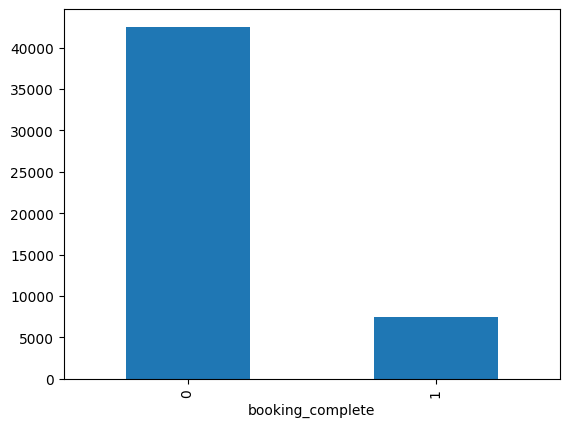

In [ ]:
data['booking_complete'].value_counts().plot(kind='bar')

In [ ]:
data.isnull().sum().sort_values(ascending=False)

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [ ]:
categorical_col=data.select_dtypes(include='object').columns
numerical_col=data.select_dtypes(exclude='object').columns

In [ ]:
categorical_col

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')

In [ ]:
numerical_col

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete'],
      dtype='object')

In [ ]:
X=data.drop('booking_complete',axis=1)
Y=data['booking_complete']

In [ ]:
X.shape,Y.shape

((50000, 13), (50000,))

In [ ]:
X=pd.get_dummies(X,drop_first=True)

In [ ]:
X

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,1,0,0,5.52,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,112,20,3,0,0,0,5.52,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,243,22,17,1,1,0,5.52,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,96,31,4,0,0,1,5.52,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,68,22,15,1,0,1,5.52,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,1,0,1,5.62,False,False,...,False,False,False,False,False,False,False,False,False,False
49996,1,111,6,4,0,0,0,5.62,False,False,...,False,False,False,False,False,False,False,False,False,False
49997,1,24,6,22,0,0,1,5.62,False,False,...,False,False,False,False,False,False,False,False,False,False
49998,1,15,6,11,1,0,1,5.62,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.35,random_state=42)

In [ ]:
X_train

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
45245,2,49,6,8,1,0,1,6.62,False,False,...,False,False,False,False,False,False,False,False,False,False
42459,1,200,6,6,0,0,0,8.83,True,False,...,False,False,False,False,False,False,False,False,False,False
5484,1,44,19,1,1,1,1,8.58,False,False,...,False,False,False,False,False,False,False,False,False,False
5910,1,117,179,10,1,0,1,5.07,False,False,...,False,False,False,False,False,False,False,False,False,False
38407,1,12,5,7,0,0,0,6.42,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1,20,91,11,1,0,1,8.58,False,False,...,False,False,False,False,False,False,False,False,False,True
44732,1,65,6,18,1,1,1,7.42,False,False,...,False,False,False,False,False,False,False,False,False,False
38158,2,107,5,6,1,0,0,7.57,True,False,...,False,False,False,False,False,False,False,False,False,False
860,4,232,19,8,0,0,0,8.83,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X_test

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
33553,2,47,4,15,1,1,0,7.00,False,False,...,False,False,False,False,False,False,False,False,False,False
9427,1,46,85,14,1,1,0,8.83,True,False,...,False,False,False,False,False,False,False,False,False,False
199,1,132,20,9,1,0,0,8.83,False,False,...,False,False,False,False,False,False,False,False,False,False
12447,1,58,18,23,1,1,1,7.57,False,False,...,False,False,False,False,False,False,False,False,False,False
39489,2,50,5,5,1,0,0,6.62,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43208,1,249,6,10,1,0,0,6.62,False,False,...,False,False,False,False,False,False,False,False,False,False
20730,1,103,32,9,0,0,0,8.83,False,False,...,False,False,False,False,False,False,False,False,False,False
25623,1,120,2,9,0,0,0,8.83,True,False,...,False,False,False,False,False,False,False,False,False,False
18663,2,13,360,6,1,1,1,8.83,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
Y_train

45245    0
42459    0
5484     0
5910     0
38407    0
        ..
11284    0
44732    0
38158    1
860      0
15795    0
Name: booking_complete, Length: 32500, dtype: int64

In [ ]:
Y_test

33553    0
9427     0
199      0
12447    0
39489    0
        ..
43208    0
20730    0
25623    0
18663    1
53       0
Name: booking_complete, Length: 17500, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(class_weight='balanced',max_iter=1000)
model=logit.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
Y_pred

c:\Users\HP\miniconda3\envs\project_env\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, ..., 0, 0, 0], shape=(17500,))

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
score=accuracy_score(Y_pred,Y_test)
print('score :',score)
print('Report:',classification_report(Y_pred,Y_test))
print(confusion_matrix(Y_pred,Y_test))

score : 0.7000571428571428
Report:               precision    recall  f1-score   support

           0       0.69      0.94      0.80     11057
           1       0.73      0.29      0.42      6443

    accuracy                           0.70     17500
   macro avg       0.71      0.62      0.61     17500
weighted avg       0.71      0.70      0.66     17500

[[10360   697]
 [ 4552  1891]]


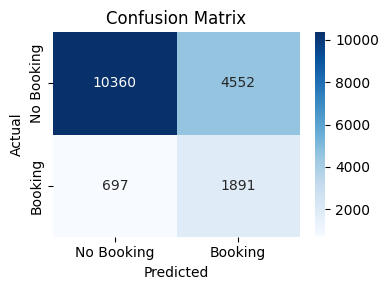

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Booking', 'Booking'],
            yticklabels=['No Booking', 'Booking'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()
